# Deep sequencing analysis for Chromatin study gRNA data

# QC module

## 1 Functions and module

### 1.1 Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import math
import copy
import seaborn as sns
import regex

### 1.2 Functions

In [2]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']),size = 6)
# label_point(temp_df['TTR'], temp_df['gRNA_recovered'], temp_df['Sample_ID'], plt.gca()) # this is for labeling

----

## 2 Input and output address

In [3]:
# combined barcode dataframe address
parent_address = "/Users/jasperx/Dropbox (Personal)/1. Haiqing Xu/1. Project/3. Ultra_seq/Summarize_chromatin_study/"
sample_summary_address1 = parent_address + "Output_data/Chromatin_65Q/Sample_summary_df.csv"
sample_summary_address2 = parent_address + "Output_data/Chromatin_58Q/Sample_summary_df.csv"

In [4]:
figure_output_address = parent_address+"Figure/Final_draft/"
# Final_df_output_address = parent_address + "Output_data/Chromatin_65Q/65Q_final_df.csv"
# sample_summary_address = parent_address + "Output_data/Chromatin_65Q/Sample_summary_df.csv"
# sample_discarded_list_address = parent_address + "Output_data/Chromatin_65Q/Discarded_sample_list.txt"

-----

## 3 Raw data processing

### 3.1 Combine summary df from 65Q and 58Q
* <font size="5"> 3.2 I only consider barcode pattern that matched the Jackie ID pattern</font>

In [5]:
Sample_summary_df1 = pd.read_csv(sample_summary_address1)

In [6]:
Sample_summary_df2 = pd.read_csv(sample_summary_address2)

In [7]:
Sample_summary_df = pd.concat([Sample_summary_df1.reset_index(drop = True),Sample_summary_df2.reset_index(drop = True)]).reset_index(drop = True)

* <font size="5"> I have cutoff for both cell number and read number</font>
* <font size="5"> $N_{sgTG_i,S_j}$ Stands for cell number of sgRNAi targeting a certain gene in mouse sample Sj</font>
* <font size="5"> $TTB_{S_j}$ stands for total tumor burden for a sample Sj </font>
* <font size="5"> $TTB_{S_j}=\sum_{i=1}^{n_{S_j}}N_{sgTG_i,S_j}$ </font>
* <font size="5"> When calculating $TTB_{S_j}$, I can also set a cutoff for a minimal cell number to be considered as real epithelial cells </font>

### 6.2 Plot

* <font size="5" color =  red> For panel A, I just want to show the how many cells each sequencing read represent</font>
* <font size="5" color =  blue> For panel B, most of the dots show positive correlation between tumor burden and tumor weight.</font>
* <font size="5" color =  green> For panel C, same as panel C. Here I just want to check if any spike in corrected sample will deviate from the line. Because if the spike-in reads are wrong, they will not follow the general trend</font>

* <font size="5" color =  brown> For panel D, I want to show the spikein ratio and total number of reads mapped to each sample. Three sample has very weird spikein ratio</font>

* <font size="5" color =  orange> For panel E, I want to show the number of gRNA recovered.</font>
* <font size="5" color =  purple> For panel F, I want to check if there is saturation of tumor burden with the increasing of more tumor.</font>

* <font size="5" color =  oliva> For panel G, I want to show the relation between virus titer and TTB.</font>

* <font size="5" color =  oliva> For panel H, I want to show the relation between virus titer and TTN.</font>
* <font size="5" color =  oliva> For panel H, I want to show the relation between sex and TTN.</font>* 

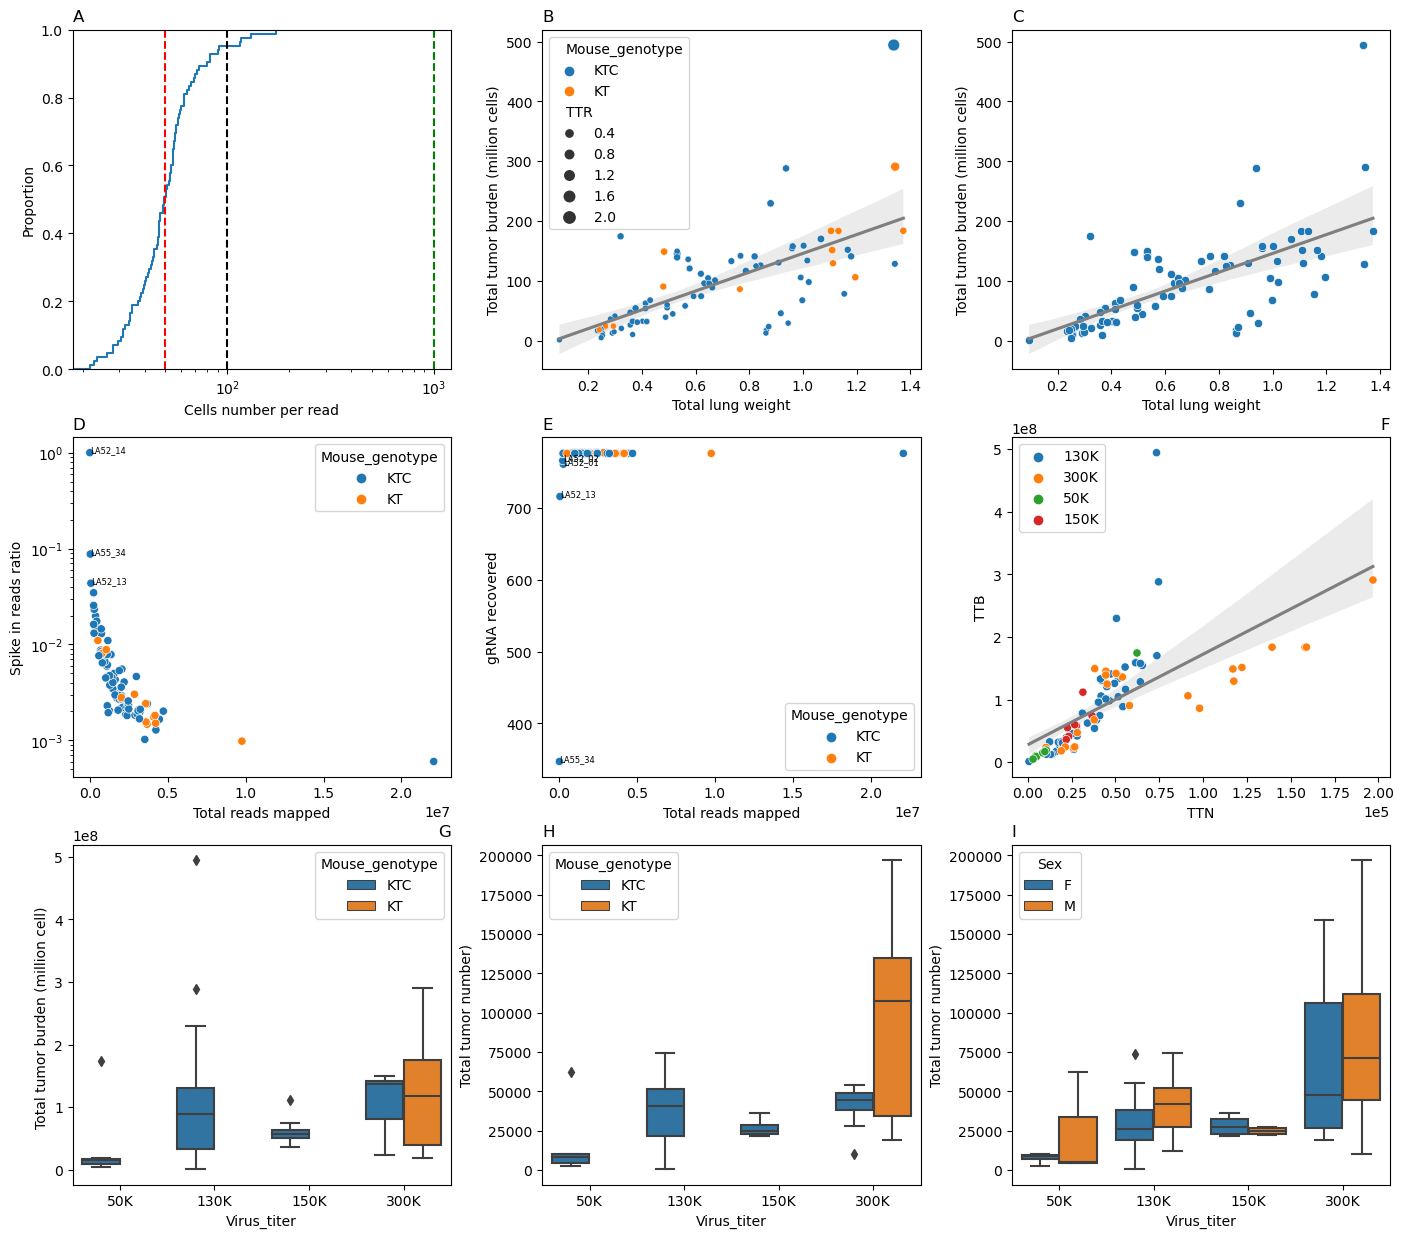

In [11]:
gs = gridspec.GridSpec(3, 17) 
fig1 = plt.figure(figsize=(17,15))

ax1=fig1.add_subplot(gs[:1, 0:5])
temp_df = Sample_summary_df
sns.ecdfplot(data=temp_df, x="Cell_number_per_read",ax = ax1)
ax1.set_xlabel('Cells number per read')
ax1.set_xscale('log')
ax1.axvline(50,color='red', linestyle='--')
ax1.axvline(100,color='black', linestyle='--')
ax1.axvline(1000,color='green', linestyle='--')
ax1.set_title('A', loc ='left')


ax2=fig1.add_subplot(gs[:1, 6:11])
temp_df = Sample_summary_df[(Sample_summary_df['Total_lung_weight']!= 0)&(~Sample_summary_df['TTB_million'].isna())]
sns.regplot(x='Total_lung_weight', y='TTB_million', data=temp_df, fit_reg=True ,ax= ax2,scatter=False,color = 'tab:grey')
sns.scatterplot(x='Total_lung_weight', y='TTB_million', data=temp_df, hue = 'Mouse_genotype',ax = ax2,size= 'TTR')
# label_point(temp_df['Total_lung_weight'], temp_df['TTB_million'], temp_df['Sample_ID'], plt.gca()) # this is for labeling
ax2.set_xlabel('Total lung weight')
ax2.set_ylabel('Total tumor burden (million cells)')
ax2.set_title('B', loc ='Left')

ax3=fig1.add_subplot(gs[:1, 12:17])
sns.regplot(x='Total_lung_weight', y='TTB_million', data=temp_df, fit_reg=True ,ax= ax3,scatter=False,color = 'tab:grey')
sns.scatterplot(x='Total_lung_weight', y='TTB_million', data=temp_df, ax = ax3)
# label_point(temp_df['Total_lung_weight'], temp_df['TTB_million'], temp_df['Sample_ID'], plt.gca()) # this is for labeling
ax3.set_xlabel('Total lung weight')
ax3.set_ylabel('Total tumor burden (million cells)')
ax3.set_title('C', loc ='Left')


ax4 = fig1.add_subplot(gs[1:2, 0:5])
sns.scatterplot(x='TTR', y='Spikein_read_ratio', data=Sample_summary_df, hue='Mouse_genotype', ax= ax4)
temp_df = Sample_summary_df[Sample_summary_df.TTR<200000] # < 0.2 million reads
label_point(temp_df['TTR'], temp_df['Spikein_read_ratio'], temp_df['Sample_ID'], plt.gca()) # this is for labeling
ax4.set_yscale('log')
ax4.set_title('D', loc ='Left')
ax4.set_xlabel('Total reads mapped')
ax4.set_ylabel('Spike in reads ratio')




ax5 = fig1.add_subplot(gs[1:2, 6:11])

sns.scatterplot(x='TTR', y='gRNA_recovered',data=Sample_summary_df,hue='Mouse_genotype', ax= ax5)

temp_df = Sample_summary_df[Sample_summary_df.gRNA_recovered<770] # 
label_point(temp_df['TTR'], temp_df['gRNA_recovered'], temp_df['Sample_ID'], plt.gca()) # this is for labeling

ax5.set_xlabel('Total reads mapped')
ax5.set_ylabel('gRNA recovered')
ax5.set_title('E', loc ='left')


temp_df = Sample_summary_df[Sample_summary_df.TTR>0] # I request at least 1 million reads
ax6 = fig1.add_subplot(gs[1:2, 12:17])
sns.regplot(x='TTN', y='TTB', data=temp_df, fit_reg=True ,ax= ax6,scatter=False,color = 'tab:grey')
sns.scatterplot(x='TTN', y='TTB', data=temp_df, hue='Virus_titer', ax= ax6)
# ax6.set_yscale('log')
ax6.set_title('F', loc ='Right')
ax6.set_xlabel('TTN')
ax6.set_ylabel('TTB')
# ax6.xaxis.major.formatter._useMathText = True
ax6.ticklabel_format(axis='both',style='sci',scilimits=(-3,4))
ax6.legend(loc='upper left')


temp_df = Sample_summary_df.sort_values(by = 'Virus_titer')
temp_df.Virus_titer = pd.Categorical(temp_df.Virus_titer,categories=['50K', '130K', '150K','300K'])
temp_df = temp_df.sort_values(by = 'Virus_titer')
ax7 = fig1.add_subplot(gs[2:3, :5])
sns.boxplot(x='Virus_titer', y='TTB', data=temp_df, hue='Mouse_genotype', ax= ax7)
ax7.set_title('G', loc ='right')
ax7.set_ylabel('Total tumor burden (million cell) ')

ax8 = fig1.add_subplot(gs[2:3, 6:11])
sns.boxplot(x='Virus_titer', y='TTN', data=temp_df, hue='Mouse_genotype', ax= ax8)
ax8.set_title('H', loc ='Left')
ax8.set_ylabel('Total tumor number)')


ax9 = fig1.add_subplot(gs[2:3, 12:17])
sns.boxplot(x='Virus_titer', y='TTN', data=temp_df, hue='Sex', ax= ax9)
ax9.set_title('I', loc ='Left')
ax9.set_ylabel('Total tumor number)')
fig1.savefig(figure_output_address+'QC_test.pdf')

### Conclusion

* <font size="5" color =  red> I will throw away sample LA55_34,LA52_13 and LA52_14,because they are having too few reads. Most of them are spike in.</font>
* <font size="5" color =  red> As usual in panel I, the male always has a higher TTN than the female.</font>
* <font size="5" color =  red> Sample with a hard cutoff of 0.1 M reads</font>

In [9]:
Sample_summary_df.sort_values(by = 'TTR')

,Sample_ID,gRNA_recovered,TTB,TTN,TTB_million,Mouse_genotype,Sex,Time_after_tumor_initiation,Total_lung_weight,Virus_titer,Correction_for_spikein,Cell_number_per_read,TTR,Mean_count,max_least_ratio,Spikein_read_ratio
69,LA52_14,NaN,NaN,NaN,NaN,KTC,F,15 wks,0.2669,50K,No,55.545269,5401,1800.333333,1.224355,1.000000
33,LA55_34,347.0,1.161702e+06,661.0,1.161702,KTC,F,15 wks,0.0933,130K,No,89.901109,38085,1112.333333,1.913934,0.087620
68,LA52_13,716.0,5.010744e+06,2967.0,5.010744,KTC,F,15 wks,0.2486,50K,No,91.827365,75113,1089.000000,1.133727,0.043494
31,LA55_32,776.0,3.257829e+07,12417.0,32.578295,KTC,M,15 wks,0.4027,130K,Yes,172.265289,251034,2897.666667,14.625243,0.034629
56,LA52_02,766.0,8.897239e+06,4881.0,8.897239,KTC,M,15 wks,0.2533,50K,No,46.540490,252597,2148.666667,1.260051,0.025519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,LA55_37,776.0,2.296104e+08,50563.0,229.610376,KTC,F,15 wks,0.8793,130K,No,54.995417,4246678,1818.333333,1.221742,0.001285
44,LA55_45,776.0,1.701344e+08,73631.0,170.134390,KTC,F,15 wks,1.0667,130K,No,40.458530,4469588,2471.666667,1.259207,0.001659
61,LA52_07A,776.0,1.452874e+08,44541.0,145.287419,KTC,M,15 wks,0.5315,300K,No,31.479538,4723521,3176.666667,1.942967,0.002018
45,LA55_46,776.0,2.909287e+08,196902.0,290.928704,KT,M,15 wks,1.3430,300K,No,31.325050,9763044,3192.333333,1.166609,0.000981


#### Output